<a href="https://colab.research.google.com/github/Prajakta1828D/The-Spark-Foundation-Task-1/blob/main/The_Spark_Foundation_Task_Number_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Author:-Prajakta Dangale**

**GRIP @ The Sparks Foundation**

# **Task 1 Prediction using Decision Tree Algorithm**


---



Decision Trees are versatile Machine Learning algorithms that can perform both classification and regression tasks, and even multioutput tasks.For the given ‘Iris’ dataset, I created the Decision Tree classifier and visualized it graphically. The purpose of this task is if we feed any new data to this classifier, it would be able to predict the right class accordingly.  

# **Importing libraries**

---



In [1]:
# Let us begin with importing libraries
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import sklearn.metrics as sm

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import pydot
from IPython.display import Image

# **Loading the Dataset**

---



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data=pd.read_csv('/content/drive/MyDrive/Algorithm/Iris.csv')

# **Exploratory Data Analysis**

---



In [4]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
data.shape

(150, 6)

In [7]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
data.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [10]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
data.drop_duplicates(inplace=True)

**Label Encoding**

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Species']=le.fit_transform(data['Species'])
data['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

# **Data Visualization comparing various features**

---



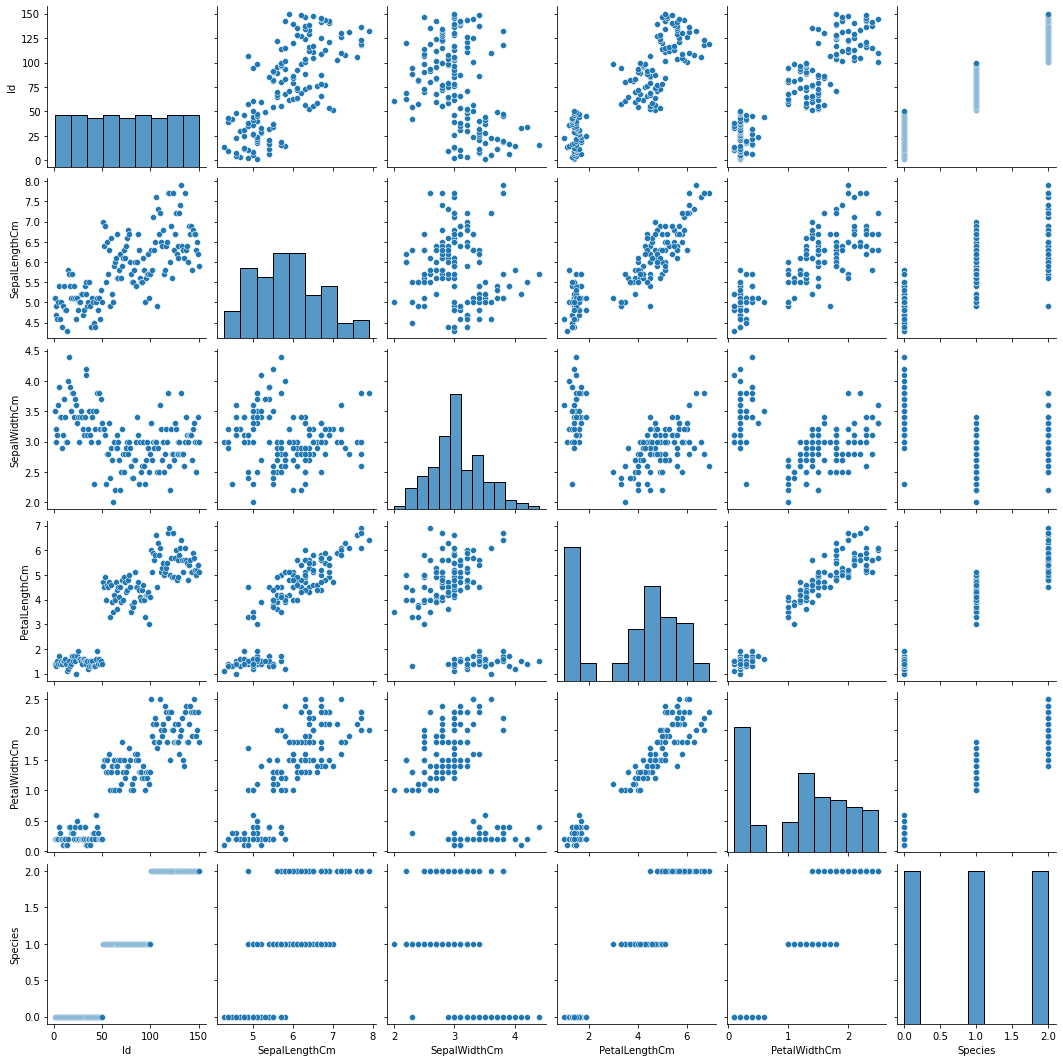

In [13]:
# Input data Visualization
sns.pairplot(data)


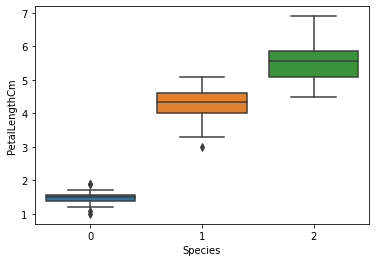

In [15]:
sns.boxplot(x="Species",y="PetalLengthCm",data=data)
plt.show()

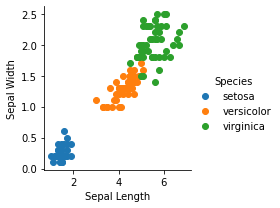

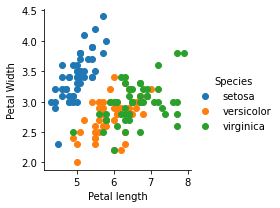

In [30]:
 # Scatter plot of data based on Sepal Length and Width features
sns.FacetGrid(data,hue='Species').map(plt.scatter,'Sepal Length','Sepal Width').add_legend()
plt.show()

# Scatter plot of data based on Petal Length and Width features
sns.FacetGrid(data,hue='Species').map(plt.scatter,'Petal length','Petal Width').add_legend()
plt.show()


# **Decision Tree Model Training**

---



In [31]:
# Model Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1) 
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train,y_train)
print("Training Complete.")
y_pred = tree_classifier.predict(X_test)


Training Complete.


**Data Visualization**

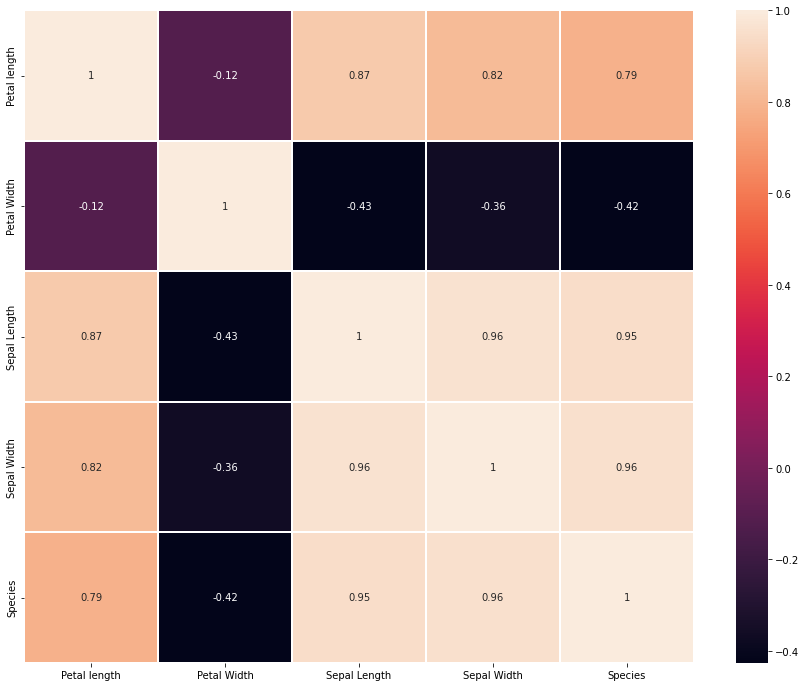

In [45]:
#HeatMap
fig=plt.figure(figsize=(15,12))
sns.heatmap(data.corr(),linewidths=1,annot=True)


# **Comparing the actual and predicted flower classification**

---



In [32]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df 


,Actual,Predicted
0,0,0
1,1,1
2,1,1
3,0,0
4,2,2
5,1,1
6,2,2
7,0,0
8,0,0
9,2,2


# **Visualizing the Trained Model**

---




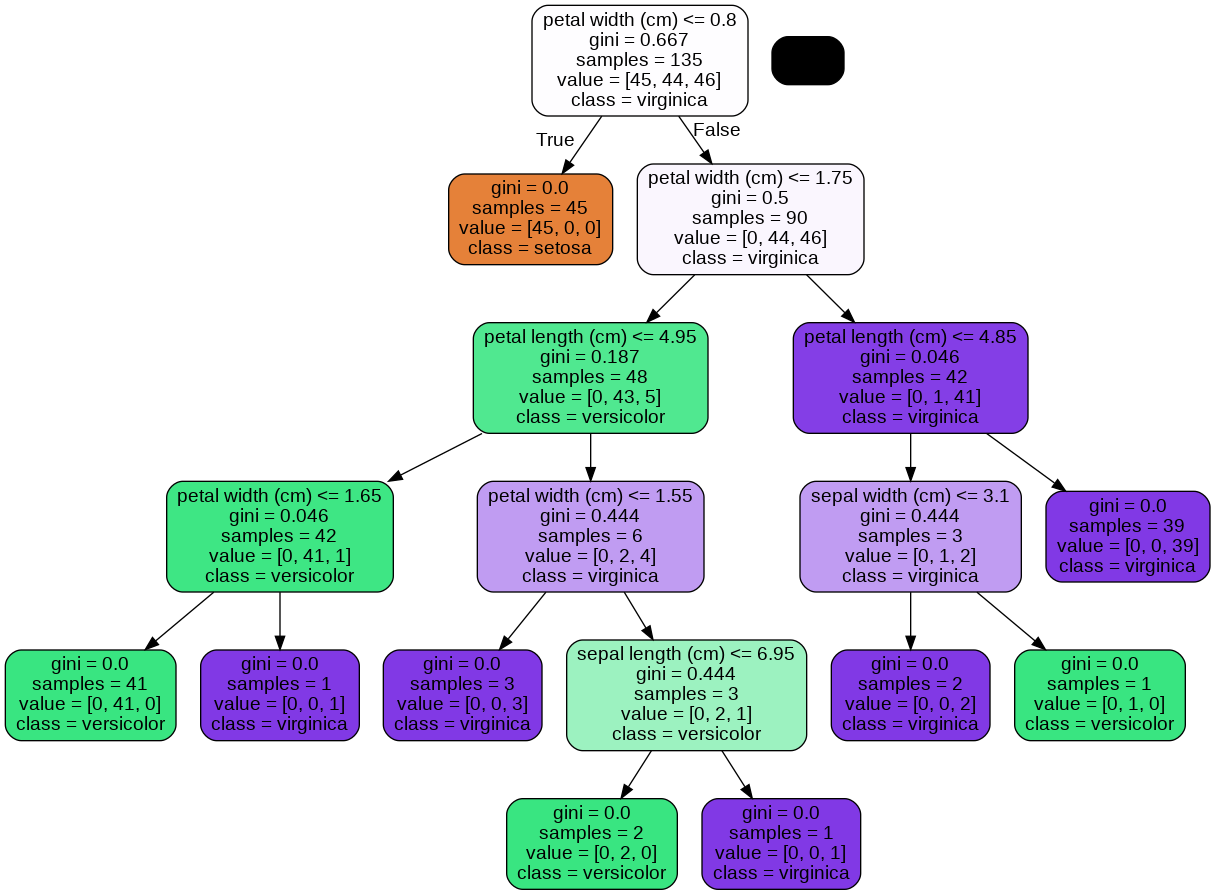

In [33]:
#Visualizing the trained Decision Tree Classifier taking all 4 features in consideration

export_graphviz(
        tree_classifier,
        out_file="img\desision_tree.dot",
        feature_names=iris.feature_names[:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
)

(graph,) = pydot.graph_from_dot_file('img\desision_tree.dot')
graph.write_png('img\desision_tree.png')

Image(filename='img\desision_tree.png') 

# **Predicting the class output for some random values of petal and sepal length and width**

---




In [34]:
print("Class Names = ",iris.target_names)

# Estimating class probabilities
print()
print("Estimating Class Probabilities for flower whose petals length width are 4.7cm and 3.2cm and sepal length and width are 1.3cm and 0.2cm. ")
print()
print('Output = ',tree_classifier.predict([[4.7, 3.2, 1.3, 0.2]]))
print()
print("Our model predicts the class as 0, that is, setosa.")


Class Names =  ['setosa' 'versicolor' 'virginica']

Estimating Class Probabilities for flower whose petals length width are 4.7cm and 3.2cm and sepal length and width are 1.3cm and 0.2cm. 

Output =  [0]

Our model predicts the class as 0, that is, setosa.


# **Calculating the Model accuracy**

---




In [35]:
# Model Accuracy
print("Accuracy:",sm.accuracy_score(y_test, y_pred))


Accuracy: 1.0


The accuracy of this model is 1 or 100% since I have taken all the 4 features of the iris dataset for creating the decision tree model.

**Conclusion**

I was able to successfully carry-out prediction using Prediction using Decision Tree Algorithm and was able to evaluate the model's accuracy score.

**Thank You**
  
    Prajakta Dangale.